# Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import mglearn

# Datasets

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=60)
print(f"The shape of X is {X.shape}")
print(f"The shape of y is {y.shape}")

The shape of X is (60, 1)
The shape of y is (60,)


# Data Partitioning

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Models

## kNN

In [12]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.53799413 -1.11661704 -0.41729794  0.74161985 -1.21785407  0.07647852
  0.94871107  0.67223847  0.7944328  -1.21785407 -0.33224706  0.94871107
 -1.27038707  0.07647852  0.75903997]
Test set R^2: 0.75


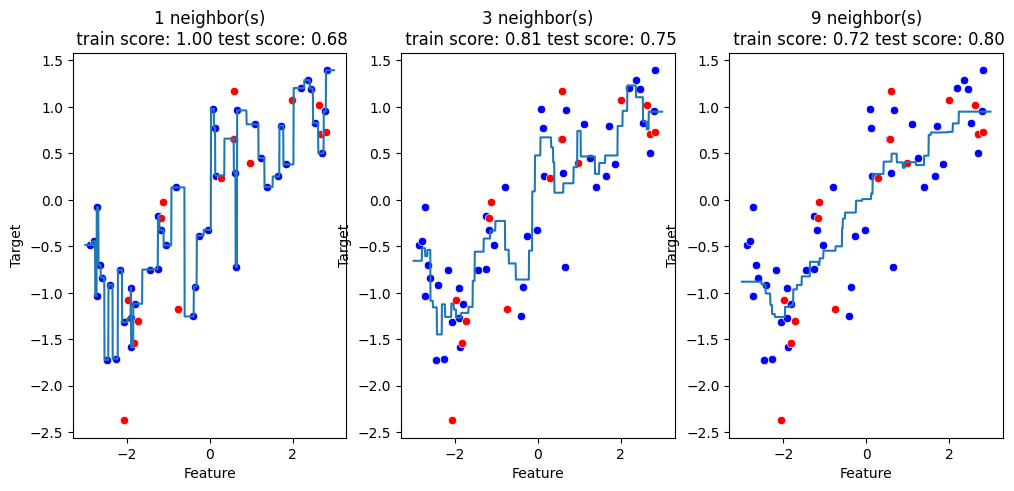

In [72]:
fig,axs = plt.subplots(1,3, figsize=(12,5))

# n_neighbors=1
# ax = axs[0]

for n_neighbors, ax in zip([1, 3, 9], axs):
    
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    pred = pd.DataFrame({"X": line[:, 0], "y": reg.predict(line)}) 

    sns.lineplot(data=pred, x="X", y="y", ax=ax)
    sns.scatterplot(data=pd.DataFrame(
        {"X_train" : X_train[:,0],
        "y_train" : y_train}), x= "X_train", 
        y="y_train", ax=ax, c="blue")

    sns.scatterplot(data=pd.DataFrame(
        {"X_test" : X_test[:,0],
        "y_test" : y_test}), x= "X_test", 
        y="y_test", ax=ax, c="red")

    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")       


## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()